# Importando Bibliotecas


In [76]:
import pandas as pd

# Importando base de dados

In [77]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [78]:
dados = pd.read_csv('tips.csv')

# Traduzindo os nomes das colunas

In [79]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [80]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [81]:
renomear = {'total_bill' : 'valor_da_conta', 
            'tip' : 'gorjeta', 
            'dessert' : 'sobremesa', 
            'day' : 'dia_da_semana', 
            'time' : 'hora_do_dia', 
            'size' : 'total_de_pessoas'}

In [82]:
gorjetas = dados.rename(columns = renomear)

In [83]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


Traduzindo os nomes dos campos

In [84]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [85]:
sim_nao = {'No' : 'Não', 
           'Yes' : 'Sim'}

In [86]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [87]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [88]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [89]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [90]:
dias = {'Sun' : 'Domingo', 
        'Sat' : 'Sábado', 
        'Thur' : 'Quinta', 
        'Fri' :'Sexta'}

In [91]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [92]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [93]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [94]:
hora = {'Dinner' : 'Jantar', 
        'Lunch' : 'Almoço'}

In [95]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [96]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o seaborn

In [97]:
import seaborn as sns

# Análise 1 - Valor da conta e gorjeta

In [98]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

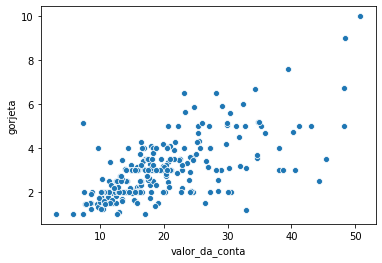

In [100]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta.**

## Criando o campo porcentagem

In [101]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [102]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


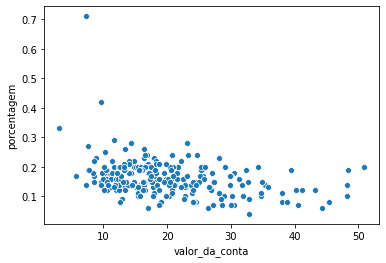

In [103]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcinal ao valor da gorjeta**

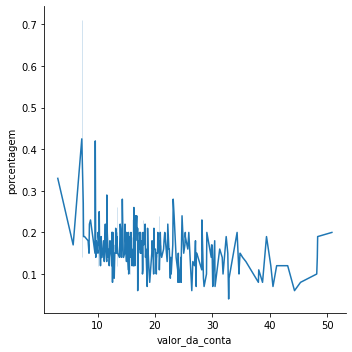

In [104]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

# Análise 2 - Sobremesa

In [54]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor__da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [74]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas
count,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874
std,8.255582,1.377190,1.017984
min,7.250000,1.000000,1.000000
25%,13.325000,2.000000,2.000000
50%,17.590000,2.740000,2.000000
75%,22.755000,3.505000,3.000000
max,48.330000,9.000000,6.000000


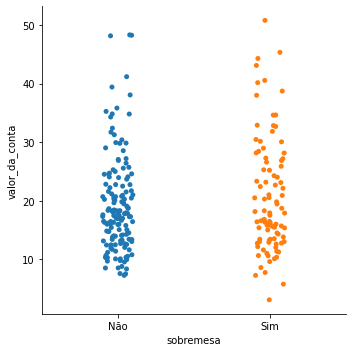

In [106]:
sns.catplot(x='sobremesa', y='valor_da_conta', data=gorjetas)

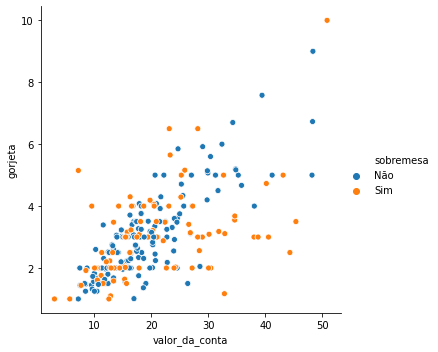

In [108]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

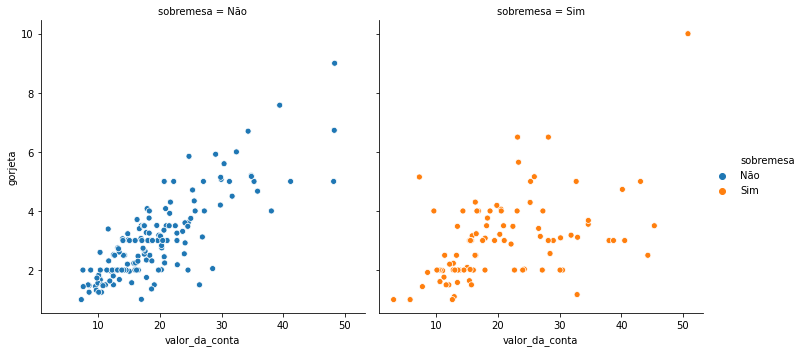

In [110]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

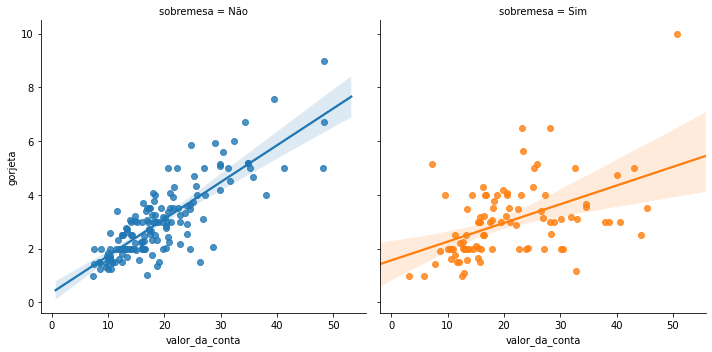

In [112]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

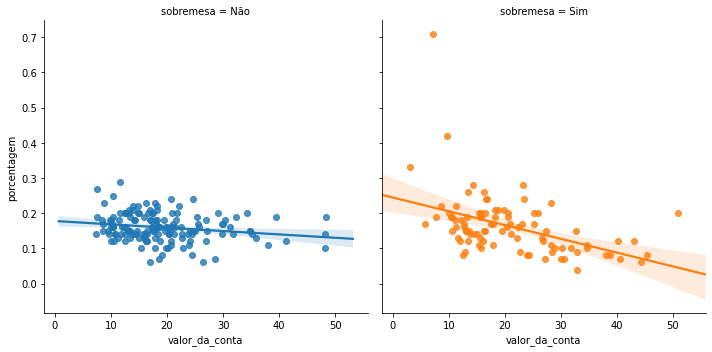

In [113]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram.**

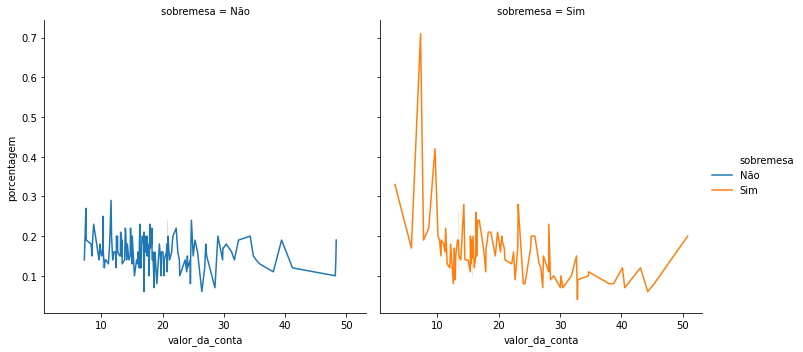

In [115]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

# Teste de hipótese

[**H<sup>null</sup>**
A distribuição da taxa da gorjeta é a mesma nos dois grupos

**H<sup>alt</sup>**
A distribuição da taxa da gorjeta não é a mesma nos dois grupos]

In [116]:
from scipy.stats import ranksums

In [118]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [119]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [123]:
r = ranksums(sobremesa, sem_sobremesa)

In [124]:
print('o valor do p=value é {}'.format(r.pvalue))

o valor do p=value é 0.5266635660124415


**H<sup>null</sup>**
A distribuição da taxa da gorjeta é a mesma nos dois grupos

# Análise 3 - Dias da semana

In [125]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [126]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


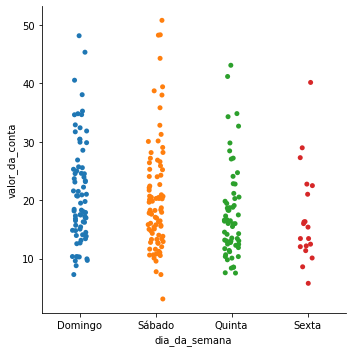

In [127]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

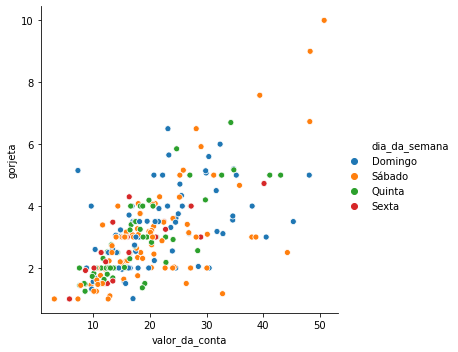

In [128]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

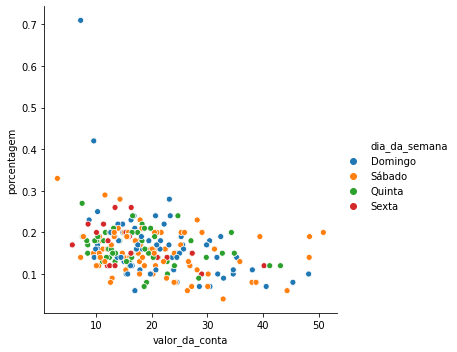

In [130]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

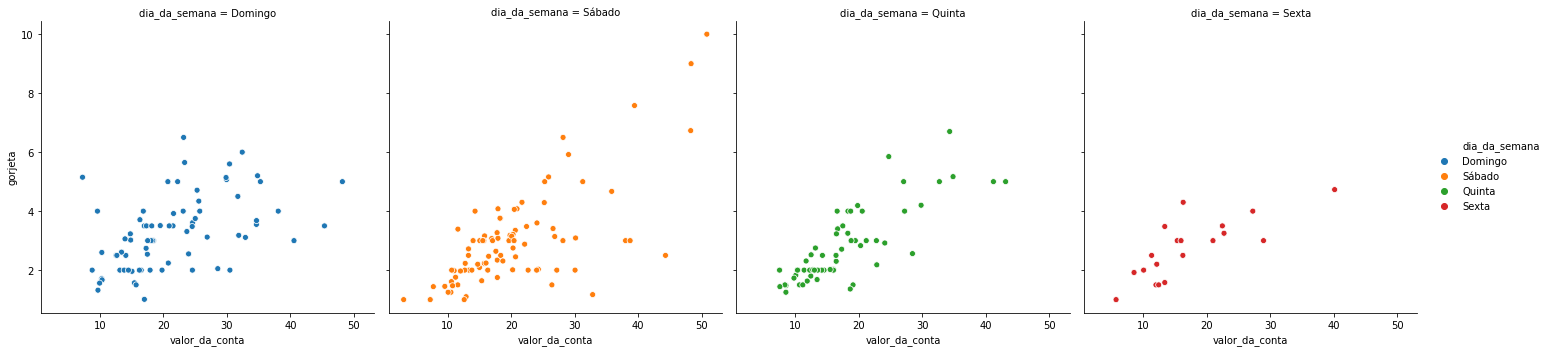

In [132]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

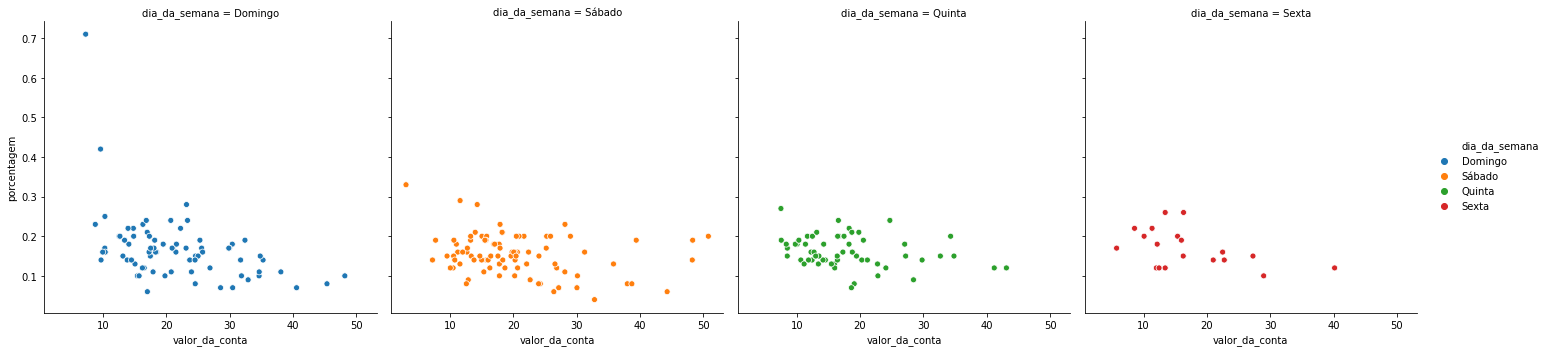

In [133]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

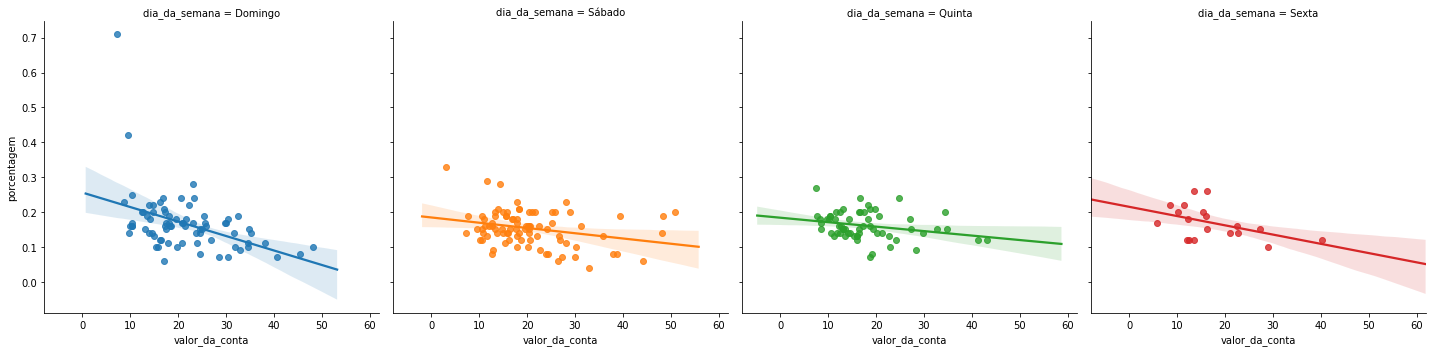

In [135]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [139]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [140]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [142]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [146]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()


Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**
A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>alt</sup>**
A distribuição do valor da conta não é igual no sábado e no domingo

In [149]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [150]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [153]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**
A distribuição do valor da conta é igual no sábado e no domingo

# Análise 4 - Hora do  dia

In [155]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [156]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

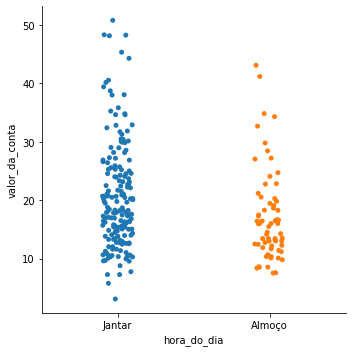

In [157]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

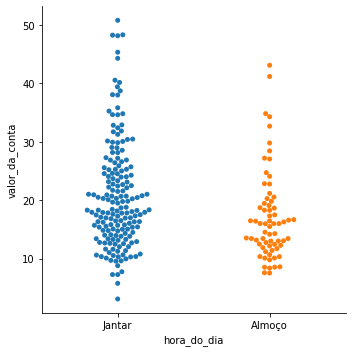

In [158]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

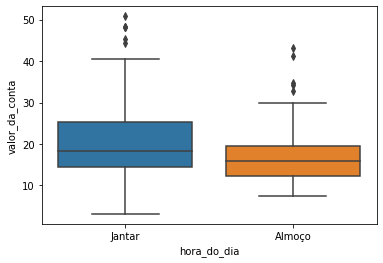

In [160]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [163]:
almoco = gorjetas.query("hora_do_dia=='Almoço'").valor_da_conta

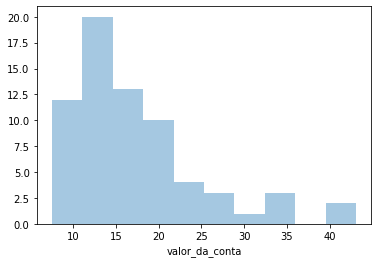

In [165]:
sns.distplot(almoco, kde=False)

In [166]:
jantar = gorjetas.query("hora_do_dia=='Jantar'").valor_da_conta

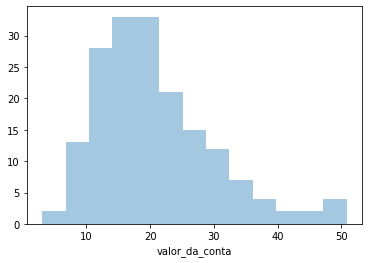

In [167]:
sns.distplot(jantar, kde=False)

In [169]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese



**H<sup>null</sup>**
A distribuição do valor da conta é igual no jantar e no almoço.

**H<sup>alt</sup>**
A distribuição do valor da conta não é igual no jantar e no almoço.

In [171]:
r3 = ranksums(jantar, almoco)

In [172]:
print('O valor do p-value é {}'.format(r3.pvalue))

O valor do p-value é 0.0011791039723641672


**H<sup>alt</sup>**
A distribuição do valor da conta não é igual no jantar e no almoço.

## Teste de hipótese 2

**H<sup>null</sup>**
A distribuição da taxa da gorjeta é igual no jantar e no almoço.

**H<sup>alt</sup>**
A distribuição da taxa da gorjeta não é igual no almoço e no jantar.

In [174]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [175]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [178]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [179]:
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**
A distribuição da taxa da gorjeta é igual no jantar e no almoço.
